# Regression Analysis

In [24]:
import pandas as pd
import numpy as np
from urllib import urlretrieve
import matplotlib.pyplot as plt

In [3]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt

-rw-r--r--  1 kbrooks  671119 Jan 12 06:45 ./data/es.txt
-rw-r--r--  1 kbrooks  361484 Jan 12 06:45 ./data/vs.txt


In [4]:
# remove blanks
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [5]:
# inspect header
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [6]:
# note semicolons between lines 3883 and 3990
for line in lines[3883:3890]:
    print line[41:]

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [7]:
# clean up code
new_file = open('./data/es50.txt', 'w') # opens new file
new_file.writelines('date' + 
                    lines[3][:-1] +
                   ';DEL' +
                   lines[3][-1]) # corrected 3rd line as first line
new_file.writelines(lines[4:]) # writes remaining lines
new_file.close()

In [9]:
# inspect new header

new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [10]:
# looks good so import

es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, 
                 sep=';', 
                 dayfirst=True)
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-01-05,3052,3178,359,336,424,370,9675,600,NaN
2016-01-06,3013,3139,354,332,419,366,9642,598,NaN
2016-01-07,2944,3085,347,326,411,356,9455,585,NaN
2016-01-08,2888,3033,341,322,405,351,9386,579,NaN
2016-01-11,2877,3027,340,321,403,349,9365,577,NaN


In [11]:
# delete helper column

del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7482 entries, 1986-12-31 to 2016-01-11
Data columns (total 8 columns):
SX5P    7482 non-null float64
SX5E    7482 non-null float64
SXXP    7482 non-null float64
SXXE    7482 non-null float64
SXXF    7482 non-null float64
SXXA    7482 non-null float64
DK5F    7482 non-null float64
DKXF    7482 non-null float64
dtypes: float64(8)
memory usage: 526.1 KB


In [12]:
# now that we know column names, reimport

cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
                 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-01-05,3052.20,3178.01,358.88,336.48,423.89,370.24,9675.14,600.21
2016-01-06,3013.13,3139.32,354.35,332.17,419.08,365.62,9641.88,597.58
2016-01-07,2943.94,3084.68,346.51,326.29,411.12,356.15,9455.01,584.60
2016-01-08,2887.84,3033.47,341.35,321.62,404.88,350.67,9385.77,579.17
2016-01-11,2876.59,3027.49,340.23,320.92,403.40,349.19,9365.11,576.65


In [13]:
# Reimport vs

vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4333 entries, 1999-01-04 to 2016-01-11
Data columns (total 9 columns):
V2TX    4333 non-null float64
V6I1    3884 non-null float64
V6I2    4333 non-null float64
V6I3    4273 non-null float64
V6I4    4333 non-null float64
V6I5    4333 non-null float64
V6I6    4316 non-null float64
V6I7    4333 non-null float64
V6I8    4319 non-null float64
dtypes: float64(9)
memory usage: 338.5 KB


In [14]:
# Build df for regression

import datetime as dt

data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                              vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [15]:
data = data.fillna(method = 'ffill') # fill missing data fwd
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4363 entries, 1999-01-04 to 2016-01-11
Data columns (total 2 columns):
EUROSTOXX    4363 non-null float64
VSTOXX       4363 non-null float64
dtypes: float64(2)
memory usage: 102.3 KB


In [16]:
data.tail()

,EUROSTOXX,VSTOXX
2016-01-05,3178.01,26.2087
2016-01-06,3139.32,26.3090
2016-01-07,3084.68,29.7899
2016-01-08,3033.47,30.4005
2016-01-11,3027.49,30.2182


array([<matplotlib.axes._subplots.AxesSubplot object at 0x106d2e310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x106d0d990>], dtype=object)

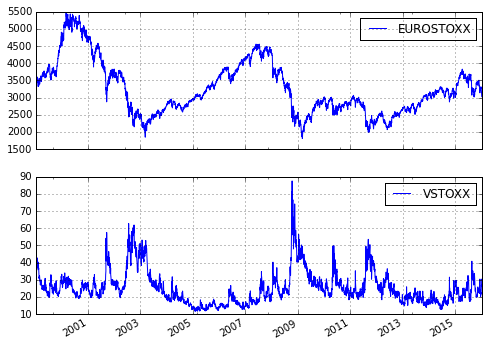

In [19]:
%matplotlib inline
data.plot(subplots=True,
         grid = True,
         style = 'b',
         figsize = (8,6))

# note negative correlation

In [20]:
rets = np.log(data / data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x106c87d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x109f18650>], dtype=object)

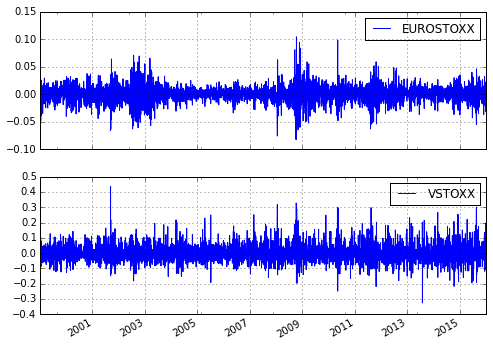

In [21]:
rets.plot(subplots=True, grid=True, style = 'b',
          figsize = (8,6))

In [22]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y = ydat, x = xdat)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4362
Number of Degrees of Freedom:   2

R-squared:         0.5404
Adj R-squared:     0.5403

Rmse:              0.0394

F-stat (1, 4360):  5126.4763, p-value:     0.0000

Degrees of Freedom: model 1, resid 4360

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.8397     0.0397     -71.60     0.0000    -2.9175    -2.7620
     intercept     0.0000     0.0006       0.02     0.9815    -0.0012     0.0012
---------------------------------End of Summary---------------------------------

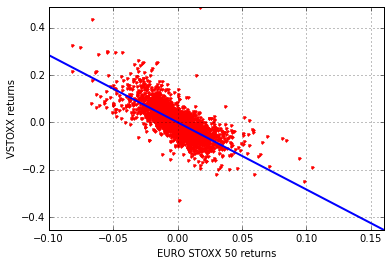

In [25]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [26]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.735118
VSTOXX,-0.735118,1.000000


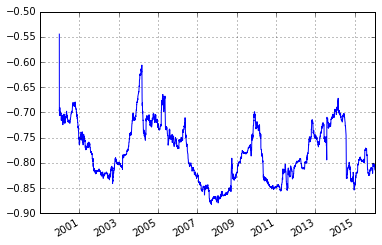

In [27]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
                window=252).plot(grid=True, style='b')